# Classification and Regressions Trees (CART)

* The purpose of this model is to transform the complex structures in the data set into simple decision structures.




* Heterogeneous data sets are divided into homogeneous subsets according to a specified target variable.

# 1-) Model by using 1 independent  and 1  dependent varaibale

## 1.1-)Data Preprocessing

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

* In order to visualize, we will first use 1 independent and 1 dependent variable.


* We chose 
       
      *"Hits "===== >>> independent variable
      
      *"Salary" ==== >>>> dependent variable

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## 1.2-) Model

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=5,min_samples_split = 2)

In [9]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

### 1-2-1) Model  Visualization

In [11]:
import matplotlib.pyplot as plt

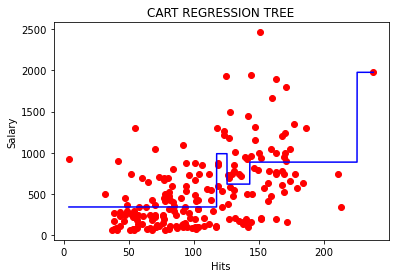

In [12]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESSION TREE')  
plt.xlabel('Hits') 
plt.ylabel('Salary') ;

* We can use the rule set of the model we created to develop business. The model's rule set can be found using the following libraries.

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#!pip install skompiler

In [ ]:
#!pip install astor

In [13]:
from skompiler import skompile

In [16]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((990.0634444444445 if x[0] <= 
    125.5 else 621.9679230769232) if x[0] <= 143.0 else 888.1370444444444) if
    x[0] <= 225.5 else 1975.0)



* Above, our decision tree model has determined which values to branch according to. In other words, he determined according to which rules he made division / classification / branching.

## 1.3-)Prediction

In [19]:
x = [91]

In [20]:
(345.2011551724138 if x[0] <= 117.5 else ((990.0634444444445 if x[0] <= 
    125.5 else 621.9679230769232) if x[0] <= 143.0 else 888.1370444444444) if
    x[0] <= 225.5 else 1975.0)

345.2011551724138

In [21]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 888.13704444, 621.96792308, 345.20115517,
       345.20115517])

In [22]:
cart_model.predict([[91]])

array([345.20115517])

In [23]:
y_pred =cart_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
test_error_before=np.sqrt(mean_squared_error(y_test, y_pred))
test_error_before #test error before  model tuning

479.5201716052201

## 1.4-) Model Tuning

* In this section, we will try to determine the optimum **min samples split, max leaf nodes,**  with the GridSearchCV method.


* GridSearchCV: Grid Search Cross Validation Methode



* Then , we will create the most optimum model by using optimum **min samples split, max leaf nodes,** .





* **min samples split, max leaf nodes,** are the hyperparameters that we will determine according to ourselves and we want it to be the most optimum.



* But instead of relying on our own feeling and sense in order to find the  optimum value of these hyperparameters   , we will find the optimum value of these hyperparameters   by using the gridsearch method.


In [30]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}


* Type of **_cart_params _** always should be _**dictionary**_ in order to use in GridSearchCV. Otherwise the code will give an erroR 

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [33]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=5),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [34]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

### 1.4.1) Tuned Model for 1 independent and 1 dependent variable 

In [35]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [36]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [37]:
y_pred1 = cart_tuned.predict(X_test)

In [57]:
test_error_after=np.sqrt(mean_squared_error(y_test, y_pred1))
test_error_after #test error after model tuning

423.406689243066

# 2) Model by using all independent variables

## 2.1-)Data Preprocessing

In [58]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [59]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## 2.2-) Model

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

## 2.3-)Prediction

In [64]:
y_pred2 = cart_model.predict(X_test)

In [65]:
test_error_before=np.sqrt(mean_squared_error(y_test, y_pred2))
test_error_before #test error before  model tuning

531.0708812673178

## 2.4-) Model Tuning

In [66]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [67]:
cart_cv_model1 = GridSearchCV(cart_model, cart_params, cv = 10)

In [68]:
cart_cv_model1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [69]:
cart_cv_model1.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

### 2.4.1) Tuned model 

In [70]:
cart_tuned1 = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [71]:
cart_tuned1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [72]:
y_pred3 = cart_tuned1.predict(X_test)

In [73]:
test_error_after=np.sqrt(mean_squared_error(y_test, y_pred3))
test_error_after #test error after model tuning

376.39788207109865